In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("data/movie.csv")

In [6]:
data.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [31]:
df = data[['num_critic_for_reviews','director_facebook_likes', 'cast_total_facebook_likes','num_user_for_reviews','gross']]
df.head(3)

,num_critic_for_reviews,director_facebook_likes,cast_total_facebook_likes,num_user_for_reviews,gross
0,723.0,0.0,4834,3054.0,760505847.0
1,302.0,563.0,48350,1238.0,309404152.0
2,602.0,0.0,11700,994.0,200074175.0


In [32]:
df.dropna(axis=0, inplace=True)

/Users/weitinglin/anaconda/envs/python3Env/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaler.fit(df)
sc_data = scaler.transform(df)
# sc_data.mean(axis=0) # standardized over column

## PAC

In [35]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=5)
pca.fit(sc_data)
x_pca = pca.transform(sc_data)

Text(0, 0.5, 'PC 2')

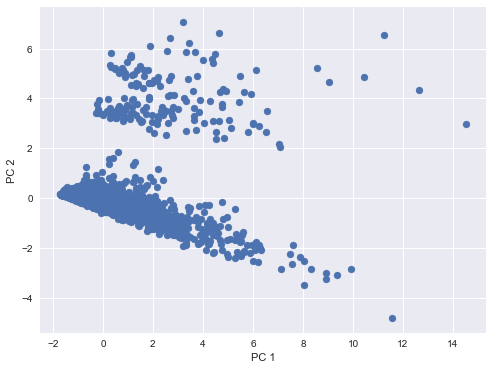

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [42]:
df_comp = pd.DataFrame(pca.components_,columns=df.columns)
df_comp

,num_critic_for_reviews,director_facebook_likes,cast_total_facebook_likes,num_user_for_reviews,gross
0,0.526977,0.258186,0.301386,0.548311,0.513961
1,-0.160925,0.920099,0.199184,-0.146633,-0.257576


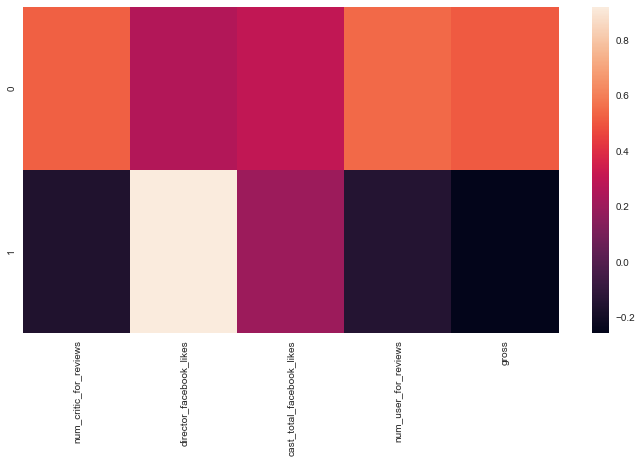

In [50]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)

In [51]:
pca.explained_variance_ratio_

array([0.45763001, 0.18353705, 0.1750588 , 0.10552512, 0.07824902])